In [79]:
# Домашнее задание к лекции «Корреляция и корреляционный анализ»

# Возьмите датасет Mortality and Water Hardness**
# https://www.kaggle.com/datasets/ukveteran/mortality-and-water-hardness

# В этом датасете содержатся данные по средней годовой смертности на
# 100000 населения и концентрации кальция в питьевой воде для 61
# большого города в Англии и Уэльсе. Города дополнительно поделены на
# северные и южные.

# Задание 1.
# Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

    # Построить точечный график
    # Рассчитать коэффициенты корреляции Пирсона и Спирмена
    # Построить модель линейной регрессии
    # Рассчитать коэффициент детерминации
    # Вывести график остатков

# Задание 2.
# Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

    # Разделить данные на 2 группы
    # Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Задание 1
df = pd.read_csv('./hw_4/water.csv') # загружаю датафрейм и смотрю общую информацию
df.head(1)
# df.info()
# df.describe()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105


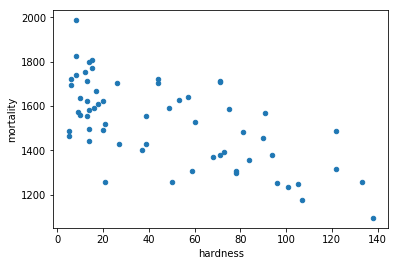

In [3]:
# точечный график, просматривается обратная корреляция между жёсткостью воды и смертностью
df.plot(kind='scatter', x='hardness', y='mortality')

In [4]:
# рассчитываю корреляцию по Пирсону
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [5]:
# рассчитываю корреляцию по Спирмену
df[['hardness', 'mortality']].corr(method='spearman')
# корреляции по обоим методам очень похожи

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [6]:
# рассчитываю корреляцию по Кендаллу, она сильно ниже
df[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.453753
mortality,-0.453753,1.000000


In [7]:
# строю линейную регрессию
X = df[['hardness']]
y = df[['mortality']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
X_train.shape
X_test.shape
# y_train.shape
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
coef_ = model.coef_
intercept_ = model.intercept_
print(coef_, intercept_)

[[-3.48410628]] [1683.13790559]


In [11]:
# строю предсказание
y_pred = model.predict(X_test)
y_pred

array([[1609.97167364],
       [1348.66370241],
       [1634.36041763],
       [1355.63191498],
       [1637.84452391],
       [1623.90809878],
       [1484.54384745],
       [1648.29684276],
       [1498.48027259],
       [1366.08423383],
       [1258.07693905],
       [1592.55114223],
       [1662.23326789],
       [1665.71737417],
       [1547.25776055],
       [1390.47297781],
       [1634.36041763],
       [1634.36041763],
       [1310.3385333 ]])

In [12]:
# строю коэф. детерминации
model.score(X_test, y_test) 

0.37142641752203

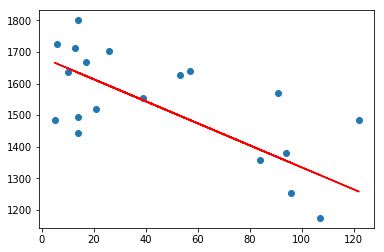

In [13]:
# смотрю на графике
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [14]:
# Вывод - есть обратная корреляция между жёсткостью воды и смертностью.

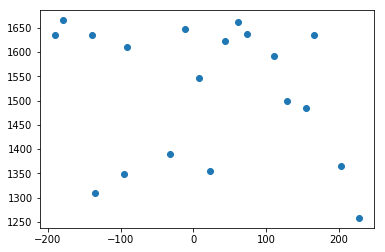

In [25]:
# Вывожу остатки
res = y_test - y_pred
plt.scatter(res, y_pred)

In [26]:
# Задание 2
# делю датафрейм на группы
dfs = df[df['location']=='South'].copy()
dfn = df[df['location']=='North'].copy()

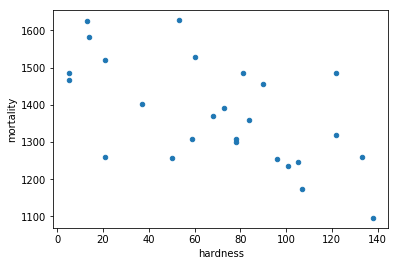

In [27]:
dfs.plot(kind='scatter', x='hardness', y='mortality') # график юг

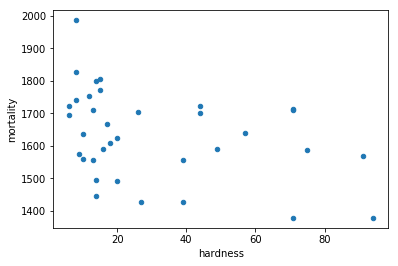

In [28]:
dfn.plot(kind='scatter', x='hardness', y='mortality') # график север

In [29]:
# считаю корреляцию двумя методами для юга и севера
# корреляция в южных городах выражена более ярко
sp = dfs[['hardness', 'mortality']].corr().loc['hardness','mortality']
ss = dfs[['hardness', 'mortality']].corr(method='spearman').loc['hardness','mortality']
np = dfn[['hardness', 'mortality']].corr().loc['hardness','mortality']
ns = dfn[['hardness', 'mortality']].corr(method='spearman').loc['hardness','mortality']
print(f"South_Pierce: {sp}\nSouth_Spearman: {ss}\nNorth_Pierce: {np}\nNorth_Spearman: {ns}")

South_Pierce: -0.6021532715484159
South_Spearman: -0.5957229185013566
North_Pierce: -0.36859783832887183
North_Spearman: -0.4042078956511175


In [30]:
# строю линейную регрессию для юга
X = dfs[['hardness']]
y = dfs[['mortality']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
X_train.shape
X_test.shape
# y_train.shape
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты
y_pred = model.predict(X_test)

In [31]:
# строю коэф. детерминации юг
model.score(X_test, y_test) 

0.5555159609368016

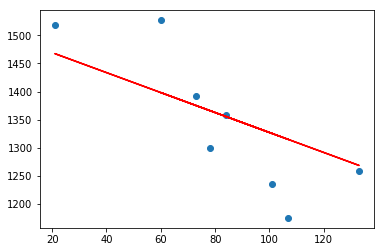

In [32]:
# смотрю на графике юг
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

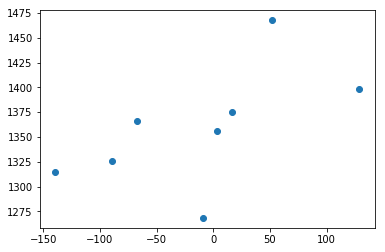

In [33]:
# Вывожу остатки для юга
res = y_test - y_pred
plt.scatter(res, y_pred)

In [34]:
# строю линейную регрессию для севера
X = dfn[['hardness']]
y = dfn[['mortality']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
X_train.shape
X_test.shape
# y_train.shape
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты
y_pred = model.predict(X_test)

In [35]:
# строю коэф. детерминации север
model.score(X_test, y_test) 

-0.5921175549128739

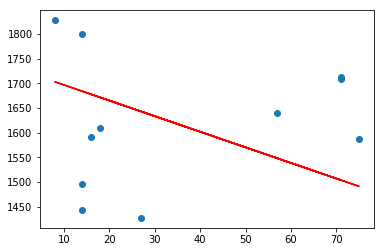

In [36]:
# смотрю на графике юг
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

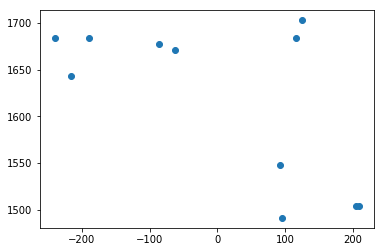

In [37]:
# Вывожу остатки для севера
res = y_test - y_pred
plt.scatter(res, y_pred)

In [38]:
# Вывод - обратная корреляция жёсткости воды и смертности прослеживается, в основном, за счёт южных городов. На севере такой взаимосвязи практически нет.